In [54]:
import pandas as pd
dataset = pd.read_csv("/home/tintin/Study/Data-Science/Statistical-Machine-Learning/NLP/Datasets/Restaurant_Reviews.tsv", delimiter = "\t")
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [55]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/tintin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
corpus = []
# for review in dataset.values[:, 0]:
#     review = re.sub("[^a‐zA‐Z]", " ", review)
#     review = review.lower()
#     review = review.split()
#     ps = PorterStemmer()
#     review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
#     review = " ".join(review)
#     corpus.append(review)
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus)

In [58]:
print(X.shape[1])
print(corpus)

1565
['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem li

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
Y = dataset.iloc[:, 1].values

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

In [64]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

0.9175
0.73


Text(0.5, 1.0, 'Confusion matrix on test set')

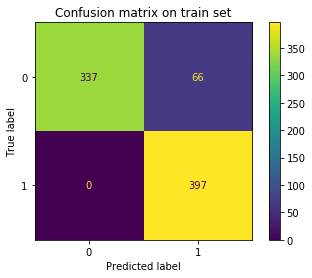

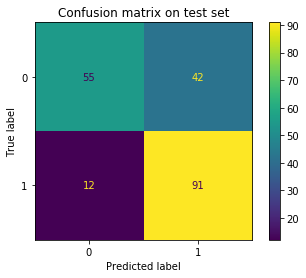

In [88]:
# Visualizing confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cm = confusion_matrix(Y_train, Y_train_pred)
plot_confusion_matrix(model, X_train, Y_train)
plt.title('Confusion matrix on train set')

cm = confusion_matrix(Y_test, Y_test_pred)
plot_confusion_matrix(model, X_test, Y_test)
plt.title('Confusion matrix on test set')


In [83]:
# Save model
import joblib as joblib
joblib.dump(model,'model.pkl')

['model.pkl']

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))
print(cm)

[[55 42]
 [12 91]]
